# Ensemble Learning

## Initial Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [5]:
# Creating an instance of label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fitting the label encoder
label_encoder.fit(df["home_ownership"])

# List the classes identified by the label encoder
list(label_encoder.classes_)

df["home_ownership_le"] = label_encoder.transform(df["home_ownership"])
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_le
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N,3
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N,1
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N,1
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N,3
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N,1


In [6]:
# Fitting the label encoder
label_encoder.fit(df["verification_status"])

# List the classes identified by the label encoder
list(label_encoder.classes_)

df["verification_status_le"] = label_encoder.transform(df["verification_status"])
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_le,verification_status_le
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N,3,1
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N,1,2
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N,1,2
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N,3,2
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N,1,0


In [7]:
# Fitting the label encoder
label_encoder.fit(df["initial_list_status"])

# List the classes identified by the label encoder
list(label_encoder.classes_)

df["initial_list_status_le"] = label_encoder.transform(df["initial_list_status"])
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_le,verification_status_le,initial_list_status_le
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,0.0,65687.0,38199.0,2000.0,61987.0,N,N,3,1,1
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,0.0,271427.0,60641.0,41200.0,49197.0,N,N,1,2,1
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,0.0,60644.0,45684.0,7500.0,43144.0,N,N,1,2,1
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,0.0,99506.0,68784.0,19700.0,76506.0,N,N,3,2,1
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,0.0,219750.0,25919.0,27600.0,20000.0,N,N,1,0,1


In [8]:
# Fitting the label encoder
label_encoder.fit(df["next_pymnt_d"])

# List the classes identified by the label encoder
list(label_encoder.classes_)

df["next_pymnt_d_le"] = label_encoder.transform(df["next_pymnt_d"])
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_le,verification_status_le,initial_list_status_le,next_pymnt_d_le
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,65687.0,38199.0,2000.0,61987.0,N,N,3,1,1,1
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,271427.0,60641.0,41200.0,49197.0,N,N,1,2,1,1
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,60644.0,45684.0,7500.0,43144.0,N,N,1,2,1,1
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,99506.0,68784.0,19700.0,76506.0,N,N,3,2,1,1
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,219750.0,25919.0,27600.0,20000.0,N,N,1,0,1,1


In [9]:
# Fitting the label encoder
label_encoder.fit(df["application_type"])

# List the classes identified by the label encoder
list(label_encoder.classes_)

df["application_type_le"] = label_encoder.transform(df["application_type"])
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_le,verification_status_le,initial_list_status_le,next_pymnt_d_le,application_type_le
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,38199.0,2000.0,61987.0,N,N,3,1,1,1,0
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,60641.0,41200.0,49197.0,N,N,1,2,1,1,0
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,45684.0,7500.0,43144.0,N,N,1,2,1,1,0
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,68784.0,19700.0,76506.0,N,N,3,2,1,1,0
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,25919.0,27600.0,20000.0,N,N,1,0,1,1,0


In [10]:
# Note; Another thing to consider: Certain machine learning models may actually place numerical significance
# on integer encodings that may bias certain models. Below, binary encoding method can be used to avoid that
# Note: The `get_dummies` function transforms the categorical feature into new columns with a `1` (True) or `0` (False) 

# Binary encoding using Pandas (on annual income for example)
##df_binary_encoded = pd.get_dummies(df, columns=["annual_inc"])
##df_binary_encoded.head()

## Split the Data into Training and Testing

In [11]:
# Create our features
# Assign all columns from df to our X then adjust to keep what is needed for X
X = df.copy()

# Drop columns that were encoded and have a second column in the df with the require (encoded) values
X.drop(["home_ownership", "verification_status", "initial_list_status", 
        "next_pymnt_d", "application_type"], axis=1, inplace=True)

# Drop load_status (our target) and all other columns that are not relevant 
# only 1 value in columns hardship_flag and debt_settlement_flag and pymnt_plan so dropping
# issue_d dropped as issue date does not seem to be a feature for loan_status
X.drop(["loan_status", "hardship_flag", "debt_settlement_flag", "pymnt_plan",
        "issue_d"], axis=1, inplace=True)

##X.head()

# Create our target
y = df["loan_status"]
y.head()
##y = df["loan_status"].values.reshape(-1, 1)

0    low_risk
1    low_risk
2    low_risk
3    low_risk
4    low_risk
Name: loan_status, dtype: object

In [12]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_le,verification_status_le,initial_list_status_le,next_pymnt_d_le,application_type_le
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04,1.812779,0.669994,0.876121,0.616839,0.139660
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.0,1.928088e+05,5.738798e+04,26795.394232,5.095845e+04,0.941313,0.719105,0.329446,0.486161,0.346637
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.0,3.600000e+03,2.350000e+02,100.000000,1.270000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.0,6.697700e+04,2.650300e+04,11600.000000,2.288000e+04,1.000000,0.000000,1.000000,0.000000,0.000000
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.0,1.467100e+05,4.535700e+04,22100.000000,4.200000e+04,1.000000,1.000000,1.000000,1.000000,0.000000
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.0,3.036400e+05,7.657000e+04,39300.000000,7.249900e+04,3.000000,1.000000,1.000000,1.000000,0.000000
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,0.0,3.292782e+06,1.295455e+06,509400.000000,1.426964e+06,3.000000,2.000000,1.000000,1.000000,1.000000


In [13]:
# Check the balance of our target values
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [14]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [15]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [17]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [18]:
# Resample the training data with the BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions =  rf_model.predict(X_test_scaled)

In [19]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, predictions)
acc_score

0.6569366919123271

In [20]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,29,63
Actual 1,23,17090


In [21]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, predictions))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.56      0.32      1.00      0.40      0.56      0.29        92
   low_risk       1.00      1.00      0.32      1.00      0.56      0.34     17113

avg / total       0.99      1.00      0.32      0.99      0.56      0.34     17205



In [22]:
# List the features sorted in descending order by feature importance

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.09867933593534835, 'last_pymnt_amnt'),
 (0.07056410862748268, 'total_rec_int'),
 (0.06786964114581466, 'total_pymnt_inv'),
 (0.06591220787678392, 'total_pymnt'),
 (0.050252920394511465, 'total_rec_prncp'),
 (0.021622454903099927, 'mo_sin_old_rev_tl_op'),
 (0.017469823573100417, 'dti'),
 (0.01681651303794507, 'mo_sin_old_il_acct'),
 (0.016346530586104257, 'max_bal_bc'),
 (0.015939649072544457, 'installment'),
 (0.015851105724516278, 'total_rec_late_fee'),
 (0.015843440910124778, 'bc_open_to_buy'),
 (0.01546422291433515, 'revol_bal'),
 (0.014987943902371433, 'total_bal_il'),
 (0.014335953581032242, 'total_rev_hi_lim'),
 (0.014328245064650762, 'total_bal_ex_mort'),
 (0.014313953379819156, 'total_bc_limit'),
 (0.014308010478344728, 'tot_hi_cred_lim'),
 (0.014268092528728925, 'il_util'),
 (0.014235622905738146, 'out_prncp_inv'),
 (0.013860353545835803, 'bc_util'),
 (0.013655178283755785, 'out_prncp'),
 (0.013581611991772564, 'annual_inc'),
 (0.013337693950764017, 'avg_cur_bal'),
 (0.013

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

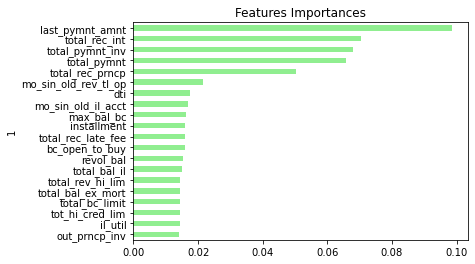

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
# Slice to get top 20 before visualizing
importances_df = importances_df[:20]
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


### Easy Ensemble Classifier

In [24]:
# Train the Classifier

# Resample the training data with the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier 

en_model = EasyEnsembleClassifier(n_estimators=100, random_state=1)

# Fitting the model
en_model = en_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions =  en_model.predict(X_test_scaled)

In [25]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, predictions)
acc_score

0.7042488039857825

In [26]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,57,35
Actual 1,3612,13501


In [27]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, predictions))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.02      0.62      0.79      0.03      0.70      0.48        92
   low_risk       1.00      0.79      0.62      0.88      0.70      0.50     17113

avg / total       0.99      0.79      0.62      0.88      0.70      0.50     17205



### Final Questions

1. Which model had the best balanced accuracy score?

EasyEnsemble (0.7042488039857825) has a better balanced accuracy score than the BalancedRandomForest (0.6569366919123271). The close this score is to 1, the better it is.

2. Which model had the best recall score?

The recall score for BalancedRandomForest fares much better for low_risk having a value of 1 as compared to the 0.79 for EasyEnsemble. However, the recall score for high_risk is only 0.32 in BalancedRandomForest but 0.62 for EasyEnsemble

In my opinion peer to peer lending - the recall score for high_risk outcome is considerably more important than the low_risk outcome and hence it would make sense to use the EasyEnsemble over BalancedRandomForest if we were using one of these models. 

3. Which model had the best geometric mean score?

EasyEnsemble has a better geo value than the BalancedRandomForest faring at 0.7 as compared to 0.56

4. What are the top three features?

As per the analysis using BalancedRandomForest, the top 3 features are Last Payment Amount, Total Rec Interest, Total Payment Indiv. 